**Задание:**
1. Реализовать класс однослойной нейронной сети (входной слой, 1 скрытый слой, выходной слой) и её обучение методом обратного распространения ошибки (backpropagation).
2. Обучить полученную нейронную сеть на выборке ирисов Фишера (приложена к заданию, iris.json).
3. Построить карту классификации для точек, не входящих в обучающую выборку для демонстрации корректной работы алгоритм. Отобразить результаты на графике.

В качестве функции активации возьмем сигмоиду

In [336]:
def sigmoid(x):
  return 1. / (1. + np.exp(-x))

# обращается в x * (1 - x), так как поступают выходы слоев сети,
# с которых уже взята сигмоида
def sigmoid_derivative(x):
  return x * (1 - x)

In [339]:
import numpy as np
import matplotlib.pyplot as plt


class Network:
  def __init__(
      self,
      input_num,
      hidden_num,
      output_num,
      learning_rate,
      epochs
  ):
    self.input_num = input_num
    self.hidden_num = hidden_num
    self.output_num = output_num
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.errors = []

    self.w_hidden = 2 * np.random.random((input_num, hidden_num)) - 1
    self.w_output = 2 * np.random.random((hidden_num, output_num)) - 1
    self.bias_hidden = 2 * np.random.random(hidden_num) - 1
    self.bias_output = 2 * np.random.random(output_num) - 1

  def back_propagation(self, obj, input_hidden, hidden_output, correct_output):
    output_error = correct_output - hidden_output
    output_derivative = -1 * output_error * sigmoid_derivative(hidden_output)

    for i in range(self.hidden_num):
      for j in range(self.output_num):
        self.w_output[i][j] -= self.learning_rate * output_derivative[j] * input_hidden[i]
        self.bias_output[j] -= self.learning_rate * output_derivative[j]
    
    hidden_derivative = np.matmul(self.w_output, output_derivative) * sigmoid_derivative(input_hidden)
    for i in range(self.input_num):
      for j in range(self.hidden_num):
        self.w_hidden[i][j] -= self.learning_rate * hidden_derivative[j] * obj[i]
        self.bias_hidden[j] -= self.learning_rate * hidden_derivative[j]

  def fit(self, X, y):
    self.errors = []
    for _ in range(self.epochs):
      total_error = 0
      for idx, (obj, obj_class) in enumerate(zip(X.values, y.values)):
        correct_output = np.zeros(self.output_num)
        correct_output[obj_class] = 1

        input_hidden = sigmoid(np.dot(obj, self.w_hidden) + self.bias_hidden.T)
        hidden_output = sigmoid(np.dot(input_hidden, self.w_output) + self.bias_output.T)

        total_error += .5 * sum((correct_output - hidden_output)**2)
        
        self.back_propagation(obj, input_hidden, hidden_output, correct_output)
      
      self.errors.append(total_error)
  
  def predict(self, obj):
    input_hidden = sigmoid(np.dot(obj, self.w_hidden) + self.bias_hidden.T)
    hidden_output = sigmoid(np.dot(input_hidden, self.w_output) + self.bias_output.T)
    return np.argmax(hidden_output)
  
  def visualize_training(self):
    x = range(len(self.errors))
    y = self.errors
    plt.plot(x, y)
    plt.show()

На скрытом слое возьмем 3 нейрона, learning_rate = 0.005, 1200 эпох:

In [360]:
nn = Network(
    input_num=2,
    hidden_num=3,
    output_num=3,
    learning_rate=0.005,
    epochs=1200
)

Загрузим выборку ирисов Фишера


In [361]:
import json

with open('iris.json') as f:
  iris_dict = json.loads(f.read())

In [362]:
import pandas as pd
df = pd.DataFrame(iris_dict, columns=["x", "y", "ans"])
X = df[['x', 'y']]
y = df[['ans']].iloc[:, 0]

Обучим нейронную сеть и выведем график изменения количества потерь:

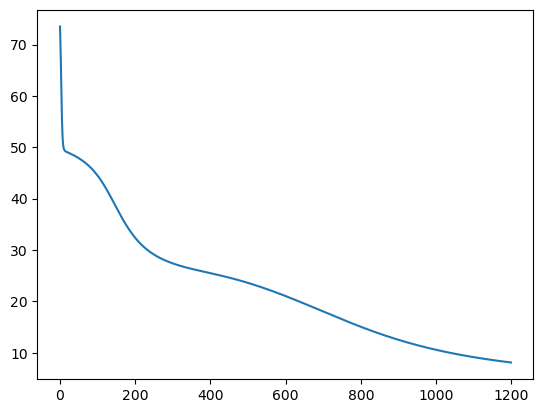

In [363]:
nn.fit(X, y)
nn.visualize_training()

Чтобы убедиться в корректности обученной модели выведем карту классификации:

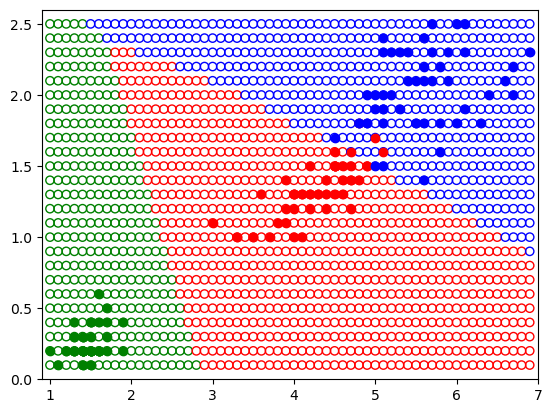

In [364]:
COLORS = {0: 'green', 1: 'red', 2: 'blue'}
STEP = 0.1

for xi in np.arange(X['x'].min(), X['x'].max() + STEP, STEP):
  for yi in np.arange(X['y'].min(), X['y'].max() + STEP, STEP):
    label = nn.predict(np.array([xi, yi]))
    plt.scatter(xi, yi, color='none', edgecolor=COLORS[label])

for idx in range(len(X)):
  plt.scatter(X['x'].values[idx], X['y'].values[idx], color=COLORS[y.values[idx]])

plt.xlim(X['x'].min() - STEP, X['x'].max() + STEP)
plt.ylim(X['y'].min() - STEP, X['y'].max() + STEP)
plt.show()